In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
import scipy.stats as stats
import math

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

import acquire 
import wrangle as w

a = .05

In [ ]:
df = acquire.new_zillow_data()

In [ ]:
filepath = Path('zillow.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath, index =False)

In [ ]:
#Identifying number of fips to encode into location name
df.fips.value_counts()

In [ ]:
# Reads local copy of csv 
df = pd.read_csv('zillow.csv')

In [ ]:
cleanup_fips = {"fips":{6037: 'Los Angeles CA', 6059:'Orange County CA', 6111: 'Ventura County CA'} }

In [ ]:
df = df.replace(cleanup_fips)


In [ ]:
df.fips

In [ ]:
df.info()

In [7]:
# Select columns of interest 
cols = ['fips','beds', 'baths','sqft','property_value']



In [2]:
#create, train, validate, test datasets

train, validate, test = w.wrangle_zillow()

In [3]:
# viewing size of train dataset
train.shape

(29288, 65)

In [4]:
# viewing size of validate dataset
validate.shape

(12553, 65)

In [5]:
# viewing size of test dataset
test.shape

(10461, 65)

In [10]:
# reviewing data for train dataset
train

,fips,beds,baths,sqft,property_value
19001,Los Angeles CA,4.0,3.0,1948.0,379950.0
41819,Los Angeles CA,4.0,3.0,2796.0,658598.0
52428,Los Angeles CA,2.0,1.0,1023.0,222739.0
291,Los Angeles CA,3.0,2.0,1463.0,177864.0
41620,Orange County CA,5.0,3.5,3232.0,1923718.0
...,...,...,...,...,...
22505,Los Angeles CA,4.0,3.0,1825.0,228365.0
43458,Los Angeles CA,4.0,3.0,1971.0,207105.0
13005,Los Angeles CA,3.0,2.0,1537.0,75080.0
18672,Los Angeles CA,3.0,2.0,1768.0,588000.0


In [50]:
train['rooms_count']= train['baths']+train['beds']

train

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,airconditioningtypeid,architecturalstyletypeid,basementsqft,baths,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc,fips_Orange County CA,fips_Ventura County CA,rooms_count
19001,261.0,10846168,28338,-0.027393,2017-04-20,31629,NaN,NaN,NaN,3.0,...,2016.0,215362.0,4750.27,Y,15.0,6.037129e+13,Single Family Residential,0,0,7.0
41819,261.0,11117113,61812,0.018309,2017-07-28,2862418,1.0,NaN,NaN,3.0,...,2016.0,244385.0,13240.03,NaN,NaN,6.037920e+13,Single Family Residential,0,0,7.0
52428,261.0,12410050,77596,0.000749,2017-09-19,2900077,NaN,NaN,NaN,1.0,...,2016.0,157067.0,2759.92,NaN,NaN,6.037553e+13,Single Family Residential,0,0,3.0
291,261.0,12697883,433,0.670008,2017-01-04,649940,NaN,NaN,NaN,2.0,...,2016.0,55070.0,2179.90,NaN,NaN,6.037296e+13,Single Family Residential,0,0,5.0
41620,261.0,14427271,61527,-0.149427,2017-07-27,1474167,NaN,NaN,NaN,3.5,...,2016.0,1471937.0,21123.34,NaN,NaN,6.059042e+13,Single Family Residential,1,0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22505,261.0,11138390,33500,0.035869,2017-05-05,286291,1.0,NaN,NaN,3.0,...,2016.0,49626.0,3318.27,NaN,NaN,6.037920e+13,Single Family Residential,0,0,7.0
43458,261.0,11282267,64249,0.024009,2017-08-07,2896138,1.0,NaN,NaN,3.0,...,2016.0,41421.0,3256.07,Y,14.0,6.037901e+13,Single Family Residential,0,0,7.0
13005,261.0,11391112,19378,-0.011952,2017-03-22,1703994,NaN,NaN,NaN,2.0,...,2016.0,33482.0,3585.08,NaN,NaN,6.037235e+13,Single Family Residential,0,0,5.0
18672,261.0,11090806,27840,-0.064925,2017-04-19,1926798,1.0,NaN,NaN,2.0,...,2016.0,432000.0,7162.98,NaN,NaN,6.037115e+13,Single Family Residential,0,0,5.0


In [77]:
train.property_value.describe()

count    2.928800e+04
mean     5.187108e+05
std      6.541880e+05
min      3.254000e+03
25%      1.919088e+05
50%      3.714565e+05
75%      6.150000e+05
max      2.385837e+07
Name: property_value, dtype: float64

In [67]:
#Rounding up in rooms count 
train['rooms_count'] = train['rooms_count'].apply(np.ceil)

### What is the median and mean home price? 

<AxesSubplot:>

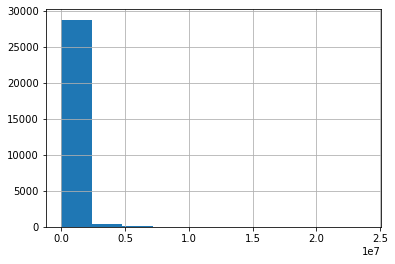

In [75]:
train.property_value.hist()

In [83]:
#calculating median of property values 
median = train.property_value.median()
median

371456.5

In [86]:
#calculating mean of property values 
mean = train.property_value.mean()
mean

518710.756760448

In [84]:
# difference between mean and median 
difference = mean - median

difference

147254.25676044798

In [88]:
train.property_value.max()

23858374.0

### Takeaways

- The median property value is 371,456
- The mean property value is 518,710
- The difference between these values is 147,254
- 50% of home values are above or below the median 
- Mean is higher than median most likely due to outlier home prices

### Is there a significant difference in mean property value across Los Angeles, Ventura County and Orange County?  

[Text(0.5, 1.0, 'Spread of Home Prices')]

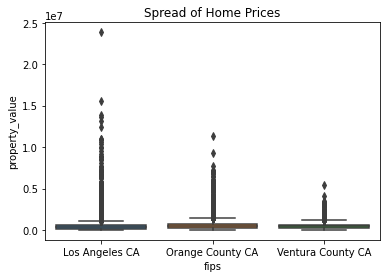

In [13]:
# box plot Fips vs Property value 
sns.boxplot(data=train, x='fips', y='property_value').set(title='Spread of Home Prices')


### Chart Takeaways 
- Difficult to verify prices but you can see there is a larger spread of home prices in Los angelese california compared to other counties.
- Orange County has the second largest spread 
- Ventura County has the smallest spread of home prices 


### Hypothesis

**Ho: There is no difference in mean property values across Los Angeles County, Ventura County and Orange County.**<br>
**Ha: There is a significant difference in mean property values across Los Angeles County, Ventura County and Orange County.** 

In [15]:
# Count of properties in each County
train.fips.value_counts()

Los Angeles CA       18970
Orange County CA      7894
Ventura County CA     2424
Name: fips, dtype: int64

In [17]:
la = train[train.fips == 'Los Angeles CA'].property_value
oc = train[train.fips == 'Orange County CA'].property_value
vc = train[train.fips == 'Ventura County CA'].property_value

<AxesSubplot:>

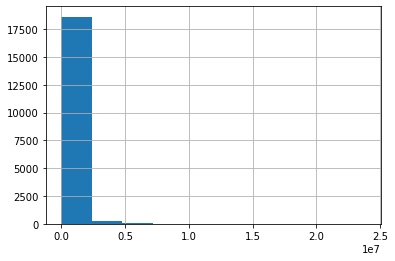

In [18]:
# histogram of prices in La County
la.hist()

<AxesSubplot:>

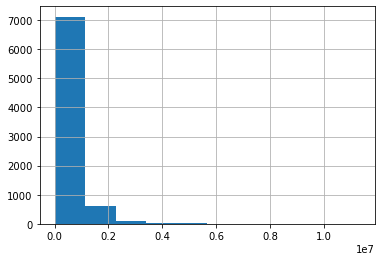

In [19]:
# histogram of prices in Orange County
oc.hist()

<AxesSubplot:>

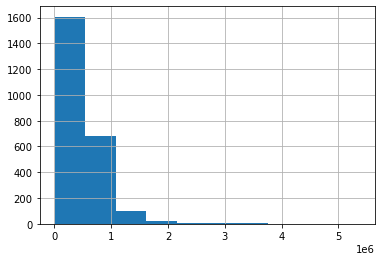

In [20]:
# histogram of prices in Ventura County
vc.hist()

In [21]:
# variance of prices in La County
la.var()

470190375995.49036

In [22]:
# variance of prices in Orange County
oc.var()

400862133755.29675

In [23]:
# variance of prices in Ventura County
vc.var()

150815222218.48343

In [26]:
# results of statistical test 
stats.kruskal(la, oc, vc)

KruskalResult(statistic=1034.6097346152808, pvalue=2.1744562124567947e-225)

### Takeaways 
- These prices are not normally distributed 
- Will use Kruskal-Wallis test since prices not normally distributed 
- Variances are not similar 
- There is a significant difference in the mean property value of the homes across Los Angeles, Ventura and Orange County 


### Is there a correlation between the sqft of a house and it's property value ?  

[Text(0.5, 1.0, 'Sqft and Value')]

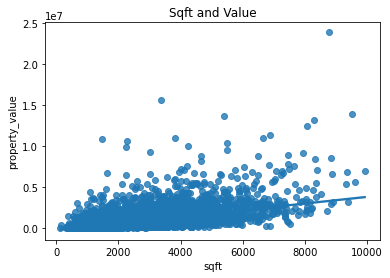

In [30]:
#visualization of sqft vs property value 

sns.regplot(x="sqft",
            y="property_value", 
            data=train).set(title='Sqft and Value')


### Chart Takeaways 
- Most homes are between 0 and 8,000 sqft 
- Most properties are under $1 million

### Hypothesis: 

**Ho: There is no correlation between home square footage and property value.**<br>
**Ha: There is a correlation between home square footage and property value.** 

In [33]:
# statistics test results 
corr, p = stats.pearsonr(train.sqft, train.property_value)

corr, p

(0.5902051076187558, 0.0)

### Takeaway from test 
- Test is significant and there is a positive correlation between home sqft and home price

### Is there a correlation between the bedrooms  and property value ?  

[Text(0.5, 1.0, 'Beds and Home Price')]

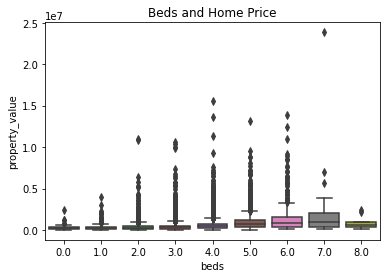

In [35]:
# box plot Bedrooms vs Property value 
sns.boxplot(data=train, x='beds', y='property_value').set(title='Beds and Home Price')


### Takeaways 

- There are a lot of outliers in each category of bedrooms 
- Most properties fall into the category of having 2 to 6 bedrooms

### Hypothesis: 

**Ho: There is no correlation between number of beds and property value.**<br>
**Ha: There is a correlation between number of beds and property value.** 


In [38]:
# Statistical test results 
corr, p = stats.pearsonr(train.beds, train.property_value)

corr, p

(0.2675540808637161, 0.0)

### Takeaways 
- Bedrooms has a weak positive correlation to the property value 

### Is there a correlation between the bathrooms  and property value ?  

[Text(0.5, 1.0, 'Baths and Home Price')]

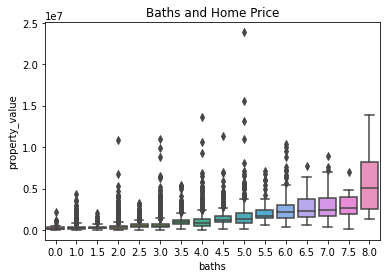

In [41]:
# box plot Bathrooms vs Property value 
sns.boxplot(data=train, x='baths', y='property_value').set(title='Baths and Home Price')

In [42]:
corr, p = stats.pearsonr(train.baths, train.property_value)

corr, p

(0.5155507725487769, 0.0)

### Hypothesis: 

**Ho: There is no correlation between number of baths and property value.**<br>
**Ha: There is a correlation between number of baths and property value.** 


### Takeaways

There is a positive correlation between bathrooms and property value

### Is there a correlation between the room count and property value ?  

[Text(0.5, 1.0, 'Rooms and Home Price')]

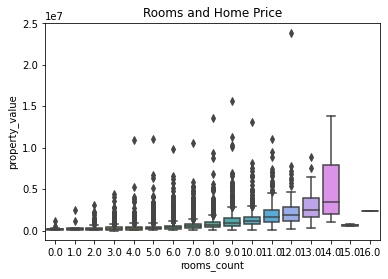

In [68]:
# box plot Bathrooms vs Property value 
sns.boxplot(data=train, x='rooms_count', y='property_value').set(title='Rooms and Home Price')

### Takeaways

- The mean price of properties is increasing as the number of rooms increase 

### Hypothesis

**Ho: TThere is no correlation between number of rooms and property value.**<br>
**Ha: There is a correlation between number of rooms and property value.** 

In [69]:
corr, p = stats.pearsonr(train.rooms_count, train.property_value)

corr, p

(0.4393310714371398, 0.0)

### Takeaways
- there is positive correlation between total rooms in a home and property value

## Exploration Summary

* Median price is 371,456 
* Mean property value is 518,710
* 50% of home values are above and below 371,456 and do not exceed 2
* The difference between Mean and Median is 147,254
* The features used for modeling will be baths, beds, sqft and fips
* The statistical tests provide support that there is a correlation between Property value and baths, beds, sqft
* Statistical testing supports a significant relationship between fips code and property value 


## Features included in Models

* The features for my models are baths, beds, sqft and fips
* These features showed an association with property value after completing my statistical tests

## Features NOT included in Model

* Rooms count will not be included in my Model
* There was a correlation to property value and rooms but it was not strong compared to the other  an association between Phone Service and Churn based on the statistical test.

## Modeling

### Introduction

* I will use accuracy as my evaluation metric because I do not have a monetary value to associate with the churn of a customer
* ~ 73% of customers don't churn 
* My baseline model assumes every customer does not churn and this results in an accuracy of 73%
* Models will be evaluated on train and validate data sets 
* The model that performs the best will be evaluated on the test data

# establish baseline model
m.baseline(train)

## Best Models

# prepare data for models
X_train, X_validate, y_train, y_validate, X_test, y_test = m.model_columns(train,validate,test)

### Decision Tree  - Model 1

In [ ]:
# test model on train and validate data 
m.decision_tree_model(X_train, X_validate, y_train, y_validate)

### Random Forrest - Model 2

### Knn - Model 3 

### Logistic Regression - Model 4

## Test Model
* I will run my logistic regression model on my test data

### Modeling Wrap 

* I would recommend this model for production because it does not over fit the data and it performs 4% better than the baseline

## Conclusion

### Summary
* 26% of customers churn 
* Statistical evidence supports an association between churn and tech support, internet service, fiber optic internet and contract type respectively 
* The drivers I used were supported by statistical tests and I believe this is why my final model was able to perform above the baseline
* There is not an association between phone service and churn 


### Modeling Summary 
* The final model performed 4% better than the baseline
* I would recommend this model for production because it does not over fit the data and and performed better than baseline


### Recommendations
* Gather qualitative and quantitative data from customer's about the performance of the fiber optic internet 
* Solicit for quantitative and qualitative data on why customer's select month to month contracts 
* Review incentives offered for each contract type. 

### Next Steps
* I would like to use the financial data to determine the mean value of churn per customer
* Look for more drivers to develop a better performing model 